In [1]:
from __future__ import annotations

# from scripts import build_cython

# build_cython.main()

Time per board: 9.306836128234863ms
Worst time: 19.845962524414062ms


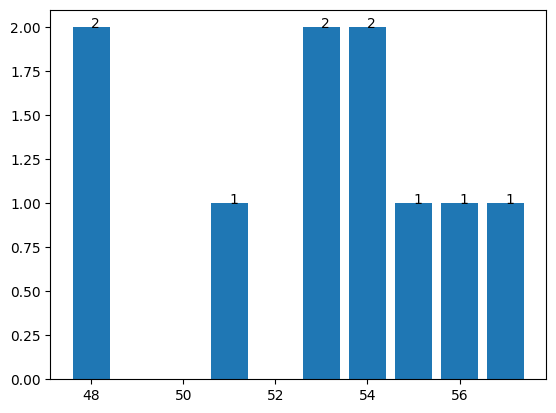

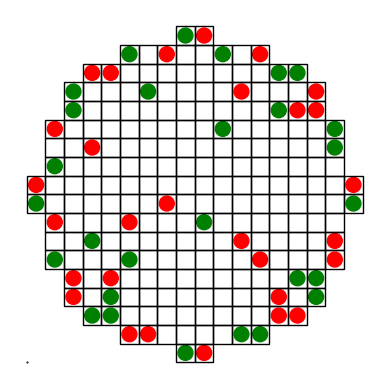

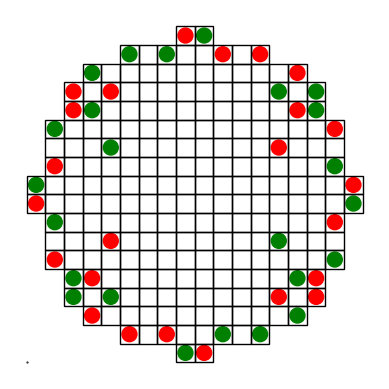

In [2]:
import collections
import time

from game.convex import grid
from game.players import heuristics
from matplotlib import pyplot as plt


def play(gri : grid.Grid) -> list[int]:
    heuristics.Heuristic.reset_id()

    h = [
        heuristics.Heuristic(gri, 1, 3),
        heuristics.Heuristic(gri, 1, 3),
    ]

    while all(not heur.busted for heur in h):
        for heur in h:
            heur.play()

        # _ = g.to_image().show()

    return [heur.id for heur in h if heur.busted]

def do(n : int) -> None:
    start = time.time()
    worst_time = 0
    best: grid.Grid = grid.Grid([])
    worst: grid.Grid | None = None
    nb_played = []

    for _ in range(n):
        gr = grid.Grid([
            # small circle
            # (1, 0),(1, 1),(2, 1),(-1, 1),(-2, 1),(0, 1),(1, 2),(-1, 2),

            # square
            # (0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
            # (1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),

            # big circle
            (1, 0), (1, 1), (2, 1), (-1, 1), (-2, 1), (0, 1),
            (1, 2), (-1, 2), (1, 3), (-1, 3), (3, 1), (-3, 1),
        ])

        t1 = time.time()

        play(gr)

        t2 = time.time()

        if t2 - t1 > worst_time:
            worst_time = t2 - t1

        nb_played.append(len(gr.played))

        if best is None or len(best.played) < len(gr.played):
            best = gr

        if worst is None or len(worst.played) > len(gr.played):
            worst = gr

    stop = time.time()

    print(f"Time per board: {(stop - start) / n * 1000}ms")  # noqa: T201 - using in ipynb
    print(f"Worst time: {worst_time * 1000}ms")  # noqa: T201 - using in ipynb

    col = collections.Counter(nb_played)
    plt.bar(list(col.keys()), list(col.values()))

    for i, v in col.items():
        plt.text(i, v, str(v))

    plt.show()

    _ = best.to_image()  # using _ =  to prevent displaying the image twice

    if worst is not None:
        _ = worst.to_image()  # using _ =  to prevent displaying the image twice

do(int(1e1))

Time per board: 26.105220079421997ms
Worst time: 78.28092575073242ms


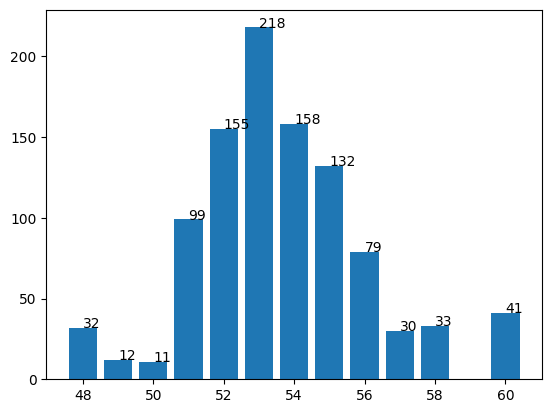

         192283508 function calls (192270248 primitive calls) in 26.686 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   26.687   26.687 {built-in method builtins.exec}
        1    0.000    0.000   26.687   26.687 <string>:1(<module>)
        1    0.008    0.008   26.687   26.687 4235882166.py:25(do)
     1000    0.038    0.000   25.787    0.026 4235882166.py:9(play)
    55146    0.124    0.000   25.691    0.000 player.py:75(play)
    55146    0.024    0.000   21.299    0.000 heuristics.py:151(_choose)
    55146    2.405    0.000   21.275    0.000 heuristics.py:33(_choice_one)
  6012655    3.169    0.000   18.128    0.000 {built-in method builtins.sum}
 57490510   11.336    0.000   14.957    0.000 heuristics.py:45(<genexpr>)
    55146    0.734    0.000    4.210    0.000 player.py:53(_add_new_pos)
102962019    3.622    0.000    3.622    0.000 {built-in method builtins.abs}
  1352154    0.219  

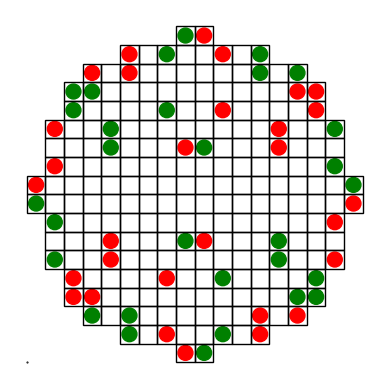

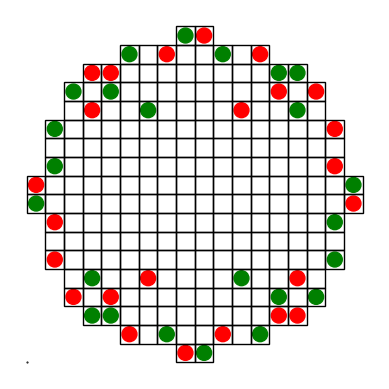

In [3]:
import cProfile

cProfile.run("do(int(1e3))", sort="cumtime")